In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/data/test.csv')

In [ ]:
print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


In [ ]:
train.head(n=20)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [ ]:
test.head(n=20)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
5,31968,choose to be :) #momtips
6,31969,something inside me dies ð¦ð¿â¨ eyes nes...
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...
8,31971,@user @user @user i will never understand why...
9,31972,#delicious #food #lovelife #capetown mannaep...


In [ ]:
train.isnull().any()
test.isnull().any()                

id       False
tweet    False
dtype: bool

In [ ]:
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

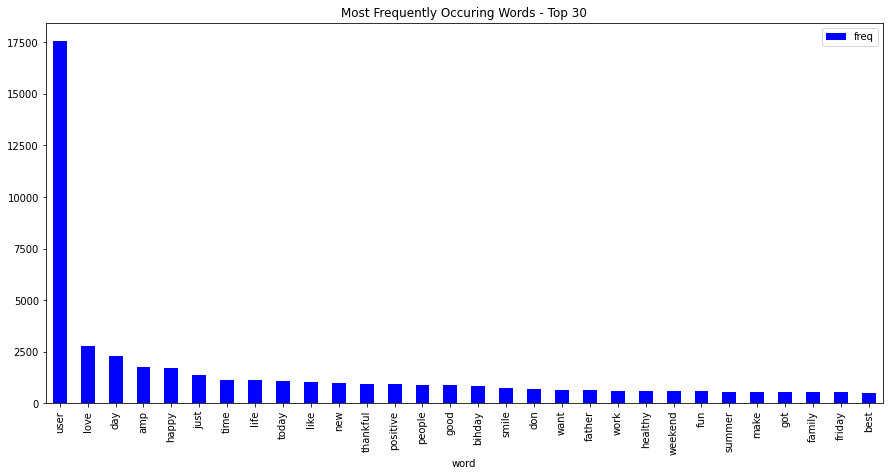

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english')    
words = cv.fit_transform(train.tweet)            
sum_words = words.sum(axis=0)
words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
train_corpus = []

for i in range(0, 31962):
  review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
  review = review.lower()
  review = review.split()
  print(review)
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  review = ' '.join(review)
  train_corpus.append(review)

Streaming output truncated to the last 5000 lines.
['nofilter', 'family', 'amazing', 'finally', 'haha', 'drink', 'sheffield']
['colorful', 'painting', 'that', 'gives', 'u', 'feeling', 'of', 'a', 'lazy', 'amp', 'lovely', 'summer', 'sunday', 'sunset', 'sundayfunday']
['like', 'this', 'litle', 'litle', 'never', 'saw', 'in', 'my', 'life', 'lovebabies', 'smallgirl', 'smallfingers', 'holidayinlithuania', 'feeling', 'loved']
['us', 'firmer', 'underlying', 'trends', 'in', 'the', 'economy', 'to', 'reasse', 'themselves', 'rbc', 'cm', 'blog', 'silver', 'gold', 'forex']
['throwback', 'thursday', 'liverpool', 'thecavernclub', 'and', 'user', 'tourist', 'tshi', 'the']
['vehicle', 'gorilla', 'simulator', 'you', 'need', 'to', 'do', 'to', 'adapt', 'to', 'the', 'environment', 'the', 'need', 'to', 'tear', 'the', 'city', 'materia']
['i', 'want', 'to', 'show', 'the', 'world', 'down', 'syndrome', 'is', 'beautiful', 'downsyndrome', 't', 'awareness', 'love', 'beautiful', 'proudmom']
['user', 'user', 'well', 'w

In [ ]:
train_corpus

['user father dysfunct selfish drag kid dysfunct run',
 'user user thank lyft credit use caus offer wheelchair van pdx disapoint getthank',
 'bihday majesti',
 'model love u take u time ur',
 'factsguid societi motiv',
 'huge fan fare big talk leav chao pay disput get allshowandnogo',
 'user camp tomorrow user user user user user user user danni',
 'next school year year exam think school exam hate imagin actorslif revolutionschool girl',
 'love land allin cav champion cleveland clevelandcavali',
 'user user welcom gr',
 'ireland consum price index mom climb previou may blog silver gold forex',
 'selfish orlando standwithorlando pulseshoot orlandoshoot biggerproblem selfish heabreak valu love',
 'get see daddi today day gettingf',
 'user cnn call michigan middl school build wall chant tcot',
 'comment australia opkillingbay seashepherd helpcovedolphin thecov helpcovedolphin',
 'ouch junior angri got junior yugyoem omg',
 'thank paner thank posit',
 'retweet agre',
 'friday smile around

In [ ]:
test_corpus = []

for i in range(0, 17197):
  review = re.sub('[^a-zA-Z]', ' ', test['tweet'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  review = ' '.join(review)
  test_corpus.append(review)

In [ ]:
test_corpus

['studiolif aislif requir passion dedic willpow find newmateri',
 'user white supremacist want everyon see new bird movi',
 'safe way heal acn altwaystoh healthi heal',
 'hp curs child book reserv alreadi ye harrypott pottermor favorit',
 'rd bihday amaz hilari nephew eli ahmir uncl dave love miss',
 'choos momtip',
 'someth insid die eye ness smokeyey tire lone sof grung',
 'finish tattoo ink ink loveit thank aleee',
 'user user user never understand dad left young deep inthefeel',
 'delici food lovelif capetown mannaepicur restur',
 'dayswast narcosi infinit ep make awar grind neuro bass lifestyl',
 'one world greatest spo event leman teamaudi',
 'half way websit allgoingwel',
 'good food good life enjoy call garlic bread iloveit',
 'stand behind guncontrolpleas senselessshoot takethegun comicrelief stillsad',
 'ate ate ate jamaisasthi fish curri prawn hilsa foodfestiv foodi',
 'user got user limit edit rain shine set today user user user user',
 'amp love amp hug amp kiss keep babi 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 1500)
x = cv.fit_transform(train_corpus).toarray()         
y = train.iloc[:, 1]                                     

print(x.shape)

(31962, 1500)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 1500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)

(17197, 1500)


In [ ]:
from sklearn.model_selection import train_test_split            
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(23971, 1500)
(7991, 1500)
(23971,)
(7991,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)
print("Validation Accuracy :", model.score(x_valid, y_valid))
cm = confusion_matrix(y_valid, y_pred)
print(cm)


Validation Accuracy : 0.9185333500187711
[[7044  388]
 [ 263  296]]


In [ ]:
Y_pred= model.predict(x_test)

In [ ]:
test['predicted_label']=Y_pred

In [ ]:
test.head(n=20)

,id,tweet,predicted_label
0,31963,#studiolife #aislife #requires #passion #dedic...,0
1,31964,@user #white #supremacists want everyone to s...,1
2,31965,safe ways to heal your #acne!! #altwaystohe...,0
3,31966,is the hp and the cursed child book up for res...,0
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",0
5,31968,choose to be :) #momtips,0
6,31969,something inside me dies ð¦ð¿â¨ eyes nes...,0
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...,0
8,31971,@user @user @user i will never understand why...,0
9,31972,#delicious #food #lovelife #capetown mannaep...,0
